In [32]:
#SVM ProPub1
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def ProPub1_svm(X,y):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=False) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))


    #Scaling data
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import cross_val_score

    sc = StandardScaler(with_mean=False)
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
    svm.fit(X_train_std, y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std, y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std, y_test)))
    print('####Train prediction Label###############################################')
    y_1=svm.predict(X_train_std)
    print(y_1)


    print('####Actual Train Label###############################################')
    # print(y_train)

    print('####Change to colors###############################################')
        
    
    return y_1,y_train
     



Populating the interactive namespace from numpy and matplotlib


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'triangular', 'uniform', 'randint', 'e', 'random', 'sample', 'seed', 'choice', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [33]:

import time
import pulp as p 
def min_max_lp_all(data,gamma,eps):
#     x1=data1
#     x2=np.logical_not(x1).astype(int)
#     data1=np.append(x1,x2,axis=0)
#   R = np.zeros((2, n), dtype = int)
#     for i in range(n):
#         if x1[i]== 1:
#             R[0][i]= 1
#         else:
    data1=np.transpose(data)
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    #X[n]=z() n last value of X
    #X=np.zeros(n+2,dtype=p.LpVariable)
    X=np.zeros(n+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
    for i in range(m):
        count=0
        for j in range(n):
            if data1.iloc[i,j]==1:
                count=count+1
                
        sizes[i]=count
    #X[]=0 to n-1

    for i in range(n):
        var1=str(i)
        
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
       
        
    X[n] =  p.LpVariable("z1",lowBound=0)
    #X[n+1] =  p.LpVariable("z2",lowBound=0)

    #########objective function#####################
    Lp_prob += X[n]
#     Lp_prob += X[n] +X[n+1]

    ##############constraint#################
    for i in range(2*m):
        if i<m:
            Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1.iloc[i,j] for j in range(n)])
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1.iloc[i,j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1.iloc[i,j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
        else:        
            Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1.iloc[i-m,j] for j in range(n)])
            
         
    ##### r(y_train values real labels of data)
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])
        
#     epsilon=.01
    #n1 is the number of elements in sensitive attribute 
           
       
    Lp_prob += X[n] <= 42000
    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("discripency is:")        
    print(p.value(Lp_prob.objective))
    x=np.zeros(n,dtype=float)
#     for i in range(n):
#         x[i]=p.value(X[i])
#     for i in range(n):
#         print(x)
   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [34]:

import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def complete(gamma,eps):
    print(check_output(["ls", "../input"]).decode("utf8"))

    # Any results you write to the current directory are saved as output.
    #Reading data from CSV file
    df = pd.read_csv('../input/1ProPublica_racidivism.csv')
    # print(df.head())
    #sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,
    #c_charge_degree,c_charge_desc,decile_score,score_text,two_year_recid,sex_race


    sensitive_attr1=df.drop(columns=['age','age_cat','juv_fel_count','juv_misd_count','juv_other_count','priors_count','c_charge_degree','c_charge_desc','decile_score','score_text','two_year_recid','sex_race'])
    sensitive_attr1 = pd.get_dummies(sensitive_attr1, columns=['race','sex'], prefix =['r','s'])

    # print(sensitive_attr.head())
    n=int(sensitive_attr1.shape[0]*0.7)
    k=n
    sensitive_attr=sensitive_attr1.iloc[0:k,:]

    m=sensitive_attr.shape[1]    
    print(sensitive_attr.shape[1]   )
    print(sensitive_attr.shape[0]   )
    print(sensitive_attr.head())
    Data = pd.get_dummies(df, columns=['c_charge_degree','score_text'], prefix =['ccd','st'])
    Data=Data.drop(columns=['sex','age_cat','race','c_charge_desc','sex_race'])
    Data['2_year_racidivism'] = Data.loc[:,'two_year_recid']
    Data=Data.drop(columns=['two_year_recid'])
    # print(Data.head())
    # n=Data.shape[0]


    X=Data.iloc[:,0:10]
    Y=Data.iloc[:,11]

    y_11,y_train1=ProPub1_svm(X,Y)


    a=0
    b=0
    c=0
    d=0
    e=0
    f=0
    g=0
    h=0
    acc1=0
    acc2=0
    acc3=0
    acc4=0
    acc5=0
    acc6=0
    acc7=0
    acc8=0

    print(n)
    print(n)
    print(n)
    for i in range(n):
            if sensitive_attr.iloc[i,0]== 1:
                a=a+1
                if y_train1[i]==1 :
                    acc1=acc1+1
            if sensitive_attr.iloc[i,1]== 1: 
                b=b+1   
                if y_train1[i]==1 :
                    acc2=acc2+1
            if sensitive_attr.iloc[i,2]== 1:
                c=c+1 
                if y_train1[i]==1 :
                    acc3=acc3+1
            if sensitive_attr.iloc[i,3]== 1 :
                d=d+1
                if y_train1[i]==1 :
                     acc4=acc4+1
            if sensitive_attr.iloc[i,4]== 1:
                e=e+1 
                if y_train1[i]==1 :
                     acc5=acc5+1
            if sensitive_attr.iloc[i,5]== 1 :
                f=f+1
                if y_train1[i]==1 :
                    acc6=acc6+1
            if sensitive_attr.iloc[i,6]== 1 :
                g=g+1
                if y_train1[i]==1 :
                    acc7=acc7+1
            if sensitive_attr.iloc[i,7]== 1: 
                h=h+1 
                if y_train1[i]==1 :
                    acc8=acc8+1
    print("Actual DI")            
    print(a,b,c,d,e,f,g,h)
    print(acc1/a,acc2/b,acc3/c,acc4/d,acc5/e,acc6/f,acc7/g,acc8/h)
    r=np.zeros(n,dtype=int)
    y_train_act=np.zeros(n,dtype=int)
    for i in range(y_11.shape[0]):
        if y_11[i]==1:
             r[i]=1            
        else:
             r[i]=-1

    for i in range(y_train1.shape[0]):
        if y_train1[i]==1:
             y_train_act[i]=1            
        else:
             y_train_act[i]=-1            
####################################
#     eps=0.10
#      gamma=0.30
######################################3
    ci=[]
   


    count1=0
    count2=0
    #count=0
    u1,u2=min_max_lp_all(sensitive_attr,gamma,eps)
    ####################################Disp_impact######  
    fi= np.zeros(n) 
    rw=0
    final=np.zeros((21,8),dtype=float)
    for alpha in np.arange(0,1.05,0.05):
        acc1=0
        acc2=0
        acc3=0
        acc4=0
        acc5=0
        acc6=0
        acc7=0
        acc8=0

        f_acc=0
        for i in range(n):
            z=random()

            if z < alpha:
                    fi[i]= int(u1[i]) 
                    #count=count+1
            else:
                   fi[i]= int(r[i])

        for i in range(n):
             if fi[i] == y_train_act[i]:
                    f_acc=f_acc+1


        f_acc_percent=f_acc/n  
        ci.append(f_acc_percent)

        for i in range(n):
            if sensitive_attr.iloc[i,0]== 1 and fi[i]==1:
                    acc1=acc1+1
            if sensitive_attr.iloc[i,1]== 1 and fi[i]==1:
                    acc2=acc2+1                     
            if sensitive_attr.iloc[i,2]== 1 and fi[i]==1:
                    acc3=acc3+1 
            if sensitive_attr.iloc[i,3]== 1 and fi[i]==1:
                    acc4=acc4+1         
            if sensitive_attr.iloc[i,4]== 1 and fi[i]==1:
                    acc5=acc5+1 
            if sensitive_attr.iloc[i,5]== 1 and fi[i]==1:
                    acc6=acc6+1 
            if sensitive_attr.iloc[i,6]== 1 and fi[i]==1:
                    acc7=acc7+1
            if sensitive_attr.iloc[i,7]== 1 and fi[i]==1:
                    acc8=acc8+1 



        a1=float(acc1/a)
        b1=float(acc2/b)
        c1=float(acc3/c)
        d1=float(acc4/d)
        e1=float(acc5/e)
        f1=float(acc6/f)
        g1=float(acc7/g)
        h1=float(acc8/h)

        print(acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8)
        
        final[rw][0]=a1
        final[rw][1]=b1
        final[rw][2]=c1
        final[rw][3]=d1
        final[rw][4]=e1
        final[rw][5]=f1
        final[rw][6]=g1
        final[rw][7]=h1
            
        rw=rw+1
        print(a1,b1,c1,d1,e1,f1,g1,h1)          
    print(final)
    print(ci)
    return ci,final
    
     




13ProPublica_violent_racidivism.csv
1ProPublica_racidivism.csv
2adult.csv
3germandata_numeric.txt
3german.txt
adult.csv
x_control_train10k.csv
x_control_train110k.csv
x_control_train1.csv
x_control_train210k.csv
x_control_train2.csv
y_all_train10k.csv
y_all_train.csv
y_train_svm10k.csv
y_train_svm.csv

8
4316
   r_african-american  r_asian  r_caucasian  r_hispanic  r_native american  \
0                   0        0            0           0                  0   
1                   1        0            0           0                  0   
2                   1        0            0           0                  0   
3                   0        0            0           0                  0   
4                   0        0            1           0                  0   

   r_other  s_female  s_male  
0        1         0       1  
1        0         0       1  
2        0         0       1  
3        1         0       1  
4        0         0       1  
There are 4316 samples in the trai

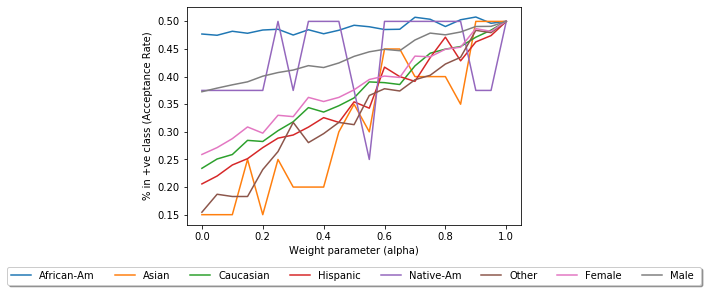

In [62]:
import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import numpy as np
#gamma=.50,.01-epsilon
#gamma=.25,.01-epsilon
gma=.50
elon=.01
acc,x=complete(gma,elon)

a=[x[i][0] for i in range(21)]   
b=[x[i][1] for i in range(21)] 
c=[x[i][2] for i in range(21)]   
d=[x[i][3] for i in range(21)] 
e=[x[i][4] for i in range(21)]   
f=[x[i][5] for i in range(21)] 
g=[x[i][6] for i in range(21)]  
h=[x[i][7] for i in range(21)]   
 


Discrepancy=np.arange(0,1.05,0.05)  
 
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Discrepancy,a,label='African-Am')   
ax.plot(Discrepancy,b,label='Asian')  
ax.plot(Discrepancy,c,label='Caucasian')  
ax.plot(Discrepancy,d,label='Hispanic')  
ax.plot(Discrepancy,e,label='Native-Am')   
ax.plot(Discrepancy,f,label='Other')  
ax.plot(Discrepancy,g,label='Female') 
ax.plot(Discrepancy,h,label='Male ')  


   
plt.title('')
ax.set_xlabel('Weight parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


# plt.axis([0, 20, 0, 0.3])
# plt.xlabel('Weight parameter (alpha)')
# plt.ylabel('% in +ve class (Acceptance Rate)')

plt.show() 

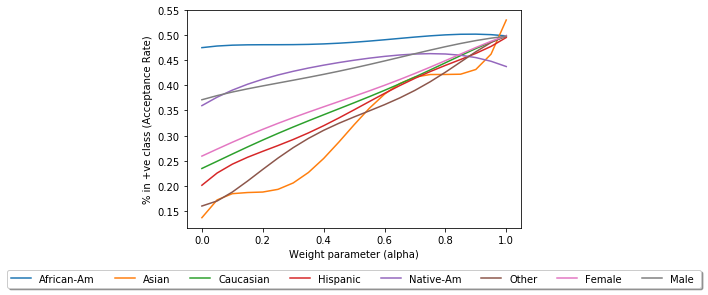

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
# x = np.array([2, 2, 5, 2, 1, 0, 1, 8, 15,13,7,2,0,9,15,6])
y1=savgol_filter(a, 21, 5)
y2=savgol_filter(b, 21, 5)
y3=savgol_filter(c, 21, 5)
y4=savgol_filter(d, 21, 5)
y5=savgol_filter(e, 21, 5)
y6=savgol_filter(f, 21, 5)
y7=savgol_filter(g, 21, 5)
y8=savgol_filter(h, 21, 5)

# z=np.arange(0,16,1)

# plt.plot(Discrepancy,b)




fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Discrepancy,y1,label='African-Am')   
ax.plot(Discrepancy,y2,label='Asian')  
ax.plot(Discrepancy,y3,label='Caucasian')  
ax.plot(Discrepancy,y4,label='Hispanic')  
ax.plot(Discrepancy,y5,label='Native-Am')   
ax.plot(Discrepancy,y6,label='Other')  
ax.plot(Discrepancy,y7,label='Female') 
ax.plot(Discrepancy,y8,label='Male ') 



   
plt.title('')
ax.set_xlabel('Weight parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 



# import numpy as np
# import matplotlib.pyplot as plt

# x = np.linspace(0,2*np.pi,100)
# y = np.sin(x) + np.random.random(100) * 0.2
# yhat = savitzky_golay(y, 51, 3) # window size 51, polynomial order 3

# plt.plot(x,y)
# plt.plot(x,yhat, color='red')
# plt.show()

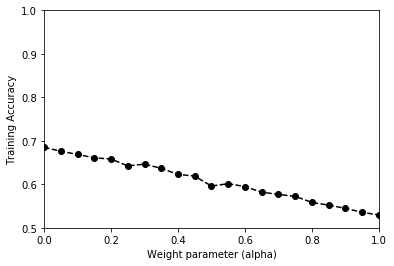

In [64]:
import matplotlib.pyplot as plt
import numpy as np
DI=np.arange(0,1.05,0.05)
plt.axis([0, 1, 0.5, 1])
plt.xlabel('Weight parameter (alpha)')
plt.ylabel('Training Accuracy')

plt.title('')
 
plt.plot(DI,acc,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=12)   

# plt.legend([""])
plt.show() 